# Diagnosis of Breast Cancer

# Utilising Binary, Supervised Machine Learning (Distance Based Algorithm i.e. KNN) and Using 5 Fold Nested Cross Validation for Robust Model Evaluation and Hyper-parameter Tuning


## Introduction

Breast cancer is now the most common cancer in the UK. It is by far the most common cancer in women.

1 in 7 women in the UK develop breast cancer during their lifetime. 

In the UK there are around 56,400 women and 390 men diagnosed with breast cancer each year [1]. 

**Diagnosis via Traditional Methods**

Doctors often use additional tests to find or diagnose breast cancer. They may refer women to a breast specialist or a surgeon. This does not mean that she has cancer or that she needs surgery. These doctors are experts in diagnosing breast problems.

- Breast ultrasound. A machine that uses sound waves to make pictures, called sonograms, of areas inside the breast.
- Diagnostic mammogram. If you have a problem in your breast, such as lumps, or if an area of the breast looks abnormal on a screening mammogram, doctors may have you get a diagnostic mammogram. This is a more detailed X-ray of the breast.
- Breast magnetic resonance imaging (MRI). A kind of body scan that uses a magnet linked to a computer. The MRI scan will make detailed pictures of areas inside the breast.
- Biopsy. This is a test that removes tissue or fluid from the breast to be looked at under a microscope and do more testing. There are different kinds of biopsies (for example, fine-needle aspiration, core biopsy, or open biopsy) [2].

**Diagnosis - Traditional Methods versus Machine Learning**

In a large study of thousands of mammograms, AI algorithms outperformed the standard clinical risk model for predicting the five-year risk for breast cancer. The results of the study were published in Radiology.

A woman’s risk of breast cancer is typically calculated using clinical models such as the Breast Cancer Surveillance Consortium (BCSC) risk model, which uses self-reported and other information on the patient—including age, family history of the disease, whether she has given birth, and whether she has dense breasts—to calculate a risk score.

“Clinical risk models depend on gathering information from different sources, which isn’t always available or collected,” said Vignesh A. Arasu, MD, PhD, a research scientist and practicing radiologist at Kaiser Permanente Northern California. “Recent advances in AI deep learning provide us with the ability to extract hundreds to thousands of additional mammographic features.”[3]

**Objective**

The team’s approach involves machine learning, which is a type of artificial intelligence, or AI. From the data the researchers input, the computers develop algorithms that enable them to learn patterns and better recognize cancerous tissue. The new image that is produced by the algorithm shows the probability of malignancy within lesions, using a color overlay with blue and green corresponding to benign tissue and red corresponding to a high probably of malignancy.

Parker and O’Connell are pleased with the 98-percent accuracy rate, but they note it was accomplished with only 121 scans of suspicious breast lesions from patients at the University of Rochester Medical Center.

“In the next stage of our research, we’ll be working with much larger sets of data,” says Parker.

Given the need for more data, it’s difficult to say how quickly their framework for computer-assisted ultrasound can be put into practice. O’Connell says, “More research is needed on many more patients for this to be widely adopted.”

But that’s how any task based on machine learning works. Computers get “smarter” with more data, producing more precise algorithms, translating into better diagnostics, and in the case of breast cancer screening, more lives saved.

Thus, our objective is to:

To utilize the Breast Cancer Wisconsin Dataset for machine learning purposes. The aim is to diagnose breast cancer by employing a supervised binary, distance-based classifier (K Nearest Neighbors), which will classify cases as either benign or malignant. The goal is to achieve more accurate diagnoses compared to traditional methods. This enhanced accuracy can provide valuable insights and assist in decision-making processes related to breast cancer diagnosis. And of course aid in saving lives.

The outcomes derived from our classification approach's metrics can ascertain the optimal set of parameters that yield the highest level of accuracy for our chosen data set.


## Dataset

The dataset was originally published on the UC Irvine, Machine Learning Repository and was imported from the Sklearn standard dataset library.  Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree.  Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

There are 569 instances and 30 attributes.  

**Attribute Information**

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

**License**
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

**File Format**

The file format is .csv, which is a delimited text file, that uses commas to separate values. However, we use a standard procedure to import from sklearn dataset library.

**Dataset Summary**

To summarize, this dataset has a good usuability score of 8.53, where it's easy to intepret and includes all the relevant metadata. Hence, after some research, it was evident this is a good quality data set for binary classification in the healthcare arena, more specifically classification of breast cancer diagnosis.

Techniques, insights, findings, rational and caveats behind the code are presented with Python comments, docstrings and individual summaries below:


## Exploratory Data Analysis 


In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import math

# Collections
from collections import Counter

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# load data
breast_cancer=datasets.load_breast_cancer()
print(breast_cancer.DESCR)

# this dataset has 30 features 
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names )


# extract the data as numpy arrays of features, X, and target, y
X = df_breast_cancer
y = breast_cancer.target

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. In our case, we have too many features for plotting purposes. However, not data in which the number of features (variables observed), are close to or larger than the number of observations (or data points).

In this case, we can index the features, using variables.  Refer to plot functions below.

We can create a grid for the Breast Cancer dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     


In [7]:
# Define plotting function
# We can create a function that, given data X and labels y, plots this grid.  The function should be invoked 
# something like this: myplotGrid(X,y,...)

# where X is our training data and y are the labels (you may also supply additional optional arguments). We can 
# We can use an appropriate library to help us create the visualisation. We can code it ourselves using 
# matplotlib functions, scatter and hist

# This populates info regarding the dataset. 
# Plot x against y, using the target labels/ class i.e. benign or malignant
# There are 2, which are indicated by the 2 different colours on plot

X=breast_cancer.data
Y=breast_cancer.target
feature_names = np.array(breast_cancer.feature_names)
target_names = breast_cancer.target_names

"""
Creating plotting function in which given x and y is transformed to dataframe
and after that seaborn module is used to plot scatter and histogram
"""
def myplotgrid(x,y,col):
    df = pd.DataFrame(x, columns=col)
    df['label'] = y
    sns.pairplot(df, hue='label')
    plt.show()

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


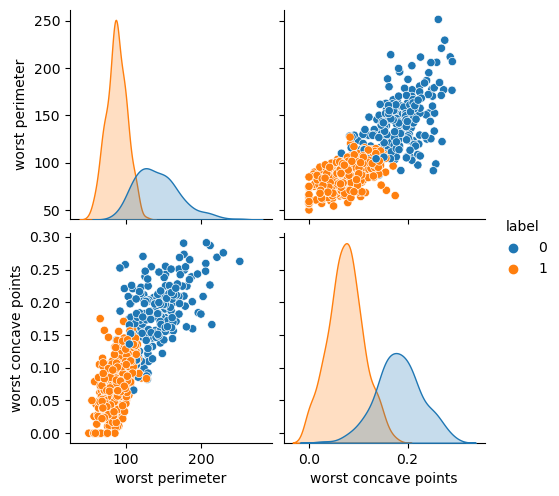

In [8]:
#****************************************** #
# Plot using function (NO NOISE added)#
#****************************************** #

#Use plotting function for any two features
#that is, parameterise, to plot different feature combinations

print(feature_names)

# We can index the features using variables, e.g.
a = 22 #substitute different values here and play around with the feature combinations
b = 27 ##substitute different values here and play around with the feature combinations

# (remember that indices in python start at 0!)

# plt.scatter(X[:, a], X[:, b], c=Y, cmap=plt.cm.Paired)
# plt.xlabel(feature_names[a])
# plt.ylabel(feature_names[b])
myplotgrid(X[:, [a,b]], Y, col=feature_names[[a,b]])

### Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, we have invoked our exploratory data analysis function above, on a noisy version of our data X.

We've perturbed our data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then we invoked

    myplotGrid(XN,y)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


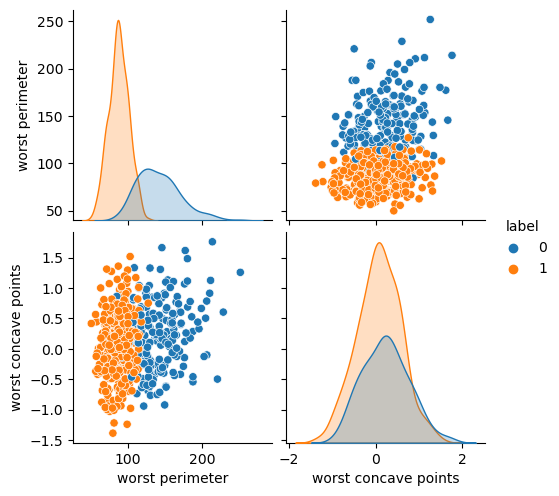

In [9]:
#****************************************** #
# Plot using function (WITH NOISE added)#
#****************************************** #

#use plotting function for any two features
#that is, parameterise, to plot different feature combinations

print(feature_names)

# we can index the features using variables, e.g.
a = 22 #substitute different values here and play around with the feature combinations
b = 27 ##substitute different values here and play around with the feature combinations

# (remember that indices in python start at 0!)

# plt.scatter(X[:, a], X[:, b], c=Y, cmap=plt.cm.Paired)
# plt.xlabel(feature_names[a])
# plt.ylabel(feature_names[b])

myseed = 12345
np.random.seed(myseed)
X_noisy=X+np.random.normal(0,0.5,X.shape)

myplotgrid(X_noisy[:, [a,b]], y, col=feature_names[[a,b]])




### Data with noise

Upon introducing Gaussian noise, the data points in our analysis display increased variability compared to the original clean dataset. This observation indicates a greater variance within the noisy dataset. Noise poses a challenge for machine learning algorithms as it may lead to improper training, where algorithms mistakenly identify noise as patterns and subsequently generalize from it. Consequently, the algorithm might overfit the noisy data, compromising its performance on new, unseen data.

To address the issue of noise, we employ nested cross-validation in our study. This technique helps mitigate the impact of noise by iteratively partitioning the data into training and validation sets. By using nested cross-validation, we can obtain more reliable estimates of the model's performance and assess its ability to generalize well to unseen data, ultimately reducing the risk of overfitting caused by noise. Finally, for classification, it is important that the class data points are significantly separated (not more varied) [6].


## Implementing the kNN Algorithm

In the cell below, we developed our own code for performing k-Nearest Neighbour classification.  We used the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying our results - our implementation did not use any libraries other than the basic numpy and matplotlib functions. 

We defined a function that performs k-NN given a set of data.  Our function was invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
Where X is our training data, y is our training outputs, X\_ are our testing data and y\_ are our predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how we choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

It helps to break the problem into various sub-problems, implemented as helper functions. For example, we might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 

Again, we aim to emphasize this distance-based algorithm, exploring KNN's unique aspects in our study. More algorithms will be introduced in future ML studies.


In [ ]:
#x_train = np.append(X_train,y_train.reshape(-1,1),axis=1)
#x_test = np.append(X_test,y_test.reshape(-1,1),axis=1)

In [10]:
# mykNN code
# There are only 3 steps for kNN:

# 1. Function for calculating Euclidean distance (known as L2 vector norm) between two vectors
def euclidean_distance(row1,row2) -> float:
    distance = 0.0
    
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2

    return round(math.sqrt(distance), 4)

# 1. Function for calculating Manhattan distance (known as L1 vector norm) between two vectors 
def manhattan(row1,row2): 
    distance = 0.0
    for i in range(len(row1)-1):
        distance += abs(row1[i] - row2[i])
    return distance

# 1. Function to calculate Chebyshev distance (known as the L∞ metric) between two vectors
def chebyshev_distance(array1, array2) -> float:
    """
    Function that takes in 2 vectors and calculates the Chebyshev Distance between them.
    Chebyshev distance is the absolute magnitude of the maximum distance between 2 points.
    Input parameters: array1, array2 -> 2 vectors.
    Output: Returns a floating point number representing the Chebyshev Distance between array1 and array2.
    """
    distance = 0.0
    
    for i in range(len(array1)):
        
        # Calculate absolute value of the distance between elements of the vectors
        dist = abs(array1[i] - array2[i])

        # Updating the maximum distance value
        if dist > distance:
            distance = dist
        
    return float(distance)

# Creating a function mapping
function_mappings = {'euclidean': euclidean_distance, 'manhattan' : manhattan, 'chebyshev' : chebyshev_distance}

# 2. Locate the most similar neighbors using our manual function
def mykNN(X,y,X_, num_neighbors,distance=euclidean_distance):
    distances = list()
    train = np.append(X,y.reshape(-1,1),axis=1)
    test_row = X_
    for train_row in train:
        dist = distance(test_row,train_row)
        distances.append((train_row, dist))

    #for each point distance is measured, a list of these distances is created. our requirement is the shortest distance
    #as we need to assign data to the neighbours.  for this purpose, lambda function takes distances list and sorts list in ascending order
    #only top distance assigned to each neighbour i.e. 1st kNN gets 1st distance from list, 2nd kNN gets 2nd distance from list...and so on
    distances.sort(key=lambda tup: tup[1])
    
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [11]:
# 3. vote for labels
# testing mykNN with manhattan distance
predict = mykNN(X,y,X[100],3,manhattan)
print('Actual:', y[100])
print('Predicted:', predict)

Actual: 0
Predicted: 0.0


In [12]:
"""
testing mykNN with euclidean distance. By default the function is 
set to euclidean, so even if distance is not defined it will choose euclidean
"""
predict = mykNN(X,y,X[100],3)
print('Actual:', y[100])
print('Predicted:', predict)

Actual: 0
Predicted: 0.0


In [13]:
# 3.vote for labels
# testing mykNN with chebychev distance
predict = mykNN(X,y,X[100],3,chebyshev_distance)
print('Actual:', y[100])
print('Predicted:', predict)

Actual: 0
Predicted: 0.0


In [15]:
#import scikit-learn for kneighboursclassifier (for verification purposes only)
#guide and verifying manual model above
np.random.seed(myseed) #random selections will be consistent every run, so results stay the same
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#split to train and test
#80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. Refer to reference 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#define knn classifier, with 10 neighbors and use the euclidian distance
knn=KNeighborsClassifier(n_neighbors=10, metric='euclidean')

#define training and testing data, fit the classifier
knn.fit(X_train,y_train)

#predict values for test data based on training data
y_pred=knn.predict(X_test)

# predicting with mykNN
myknn_pred = list()
for i in range(len(X_test)):
    myknn_pred.append(int(mykNN(X_train,y_train,X_test[i], 10)))
    
#print values
print("True Values", y_test) # true values
print("\nSklearn's KNN Classifier: ", y_pred) 
print("\nOur KNN Classifier: ", myknn_pred) 
print(len(y_pred) == len(myknn_pred))
print(len(y_pred))

True Values [1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0
 0 1 0]

Sklearn's KNN Classifier:  [1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0
 0 1 1]

Our KNN Classifier:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
True
114


In [16]:
# Calculating accuracies of both classifiers
from sklearn.metrics import accuracy_score as acc
print("Accuracy of Sklearn KNN Classifier: ", acc(y_test, y_pred))
print("Accuracy of Our KNN Classifier: ", acc(y_test, myknn_pred))

Accuracy of Sklearn KNN Classifier:  0.9298245614035088
Accuracy of Our KNN Classifier:  0.9298245614035088


## Summary of Implementing KNN (Distance Based Algorithm):

In this study, among the multitude of machine learning models available, the KNN (K-Nearest Neighbors) algorithm was selected. KNN is known as a lazy learner, as opposed to an eager learner. This designation implies that the model does not require prior learning or training, as it utilizes all available data points during the prediction phase. The lazy learner stores the training dataset and waits until classification is needed for a particular data point.

When constructing machine learning models, historical data, such as this breast cancer dataset used in this study, is employed to facilitate learning the relationships between input features (thirty, in this case) and the predicted output. However, the question arises: how can we ascertain the model's effectiveness on new, unseen data? To address this concern, we evaluate the model using metrics such as bias versus variance, precision versus recall, and accuracy.

During model evaluation, it is crucial to assess the presence of high bias or high variance. One approach to accomplish this is by conducting a train-test split, as implemented in the provided code. In this study, the model was trained on 80% of the data, while the remaining 20% was used to measure the error rate. A model exhibiting low error rates in both the training and test datasets signifies an appropriate balance between bias and variance, resulting in a well-performing model.

Bias represents the error resulting from flawed assumptions in the learning algorithm. A model with high bias may overlook relevant relationships between features and target outputs, effectively oversimplifying the model. On the other hand, variance relates to the variability of predictions and reflects the expectation of the squared deviation from the mean. The objective is to achieve a model with low bias and low variance.

The KNN algorithm tends to perform better with a smaller number of features, such as ours (high-dimensional data, is where the number of features or covariates can even be larger than the number of independent samples). This ensures that the model does not suffer from the curse of dimensionality, which refers to overfitting that can occur when the number of features/dimensions in the data increases excessively.

Finally, it is worth noting that both the manual classifier and the Sklearn KNN classifier in this study produced identical predictions, indicating consistent outcomes between the two approaches [7, 8, 9, 10].


## Classifier evaluation 

In the cell below, we implemented our own classifier evaluation code. This includes some way of calculating confusion matrices, as well as common metrics like accuracy. 

The output of our confusion matrices are displayed below.

We tested our functions on some test data, and compared the results to the sklearn library versions. 


In [30]:
labels = breast_cancer.target_names

In [31]:
def evaluation_metric(true, predict, labels=labels):
    actual = np.array(true)
    predicted = np.array(predict)

    #calculate the confusion matrix; labels is numpy array of classification labels
    cm = np.zeros((len(labels), len(labels)))
    for a, p in zip(actual, predicted):
            #print(a, p)
            cm[a][p] += 1

    #also get the accuracy easily with numpy
    accuracy = (actual == predicted).sum() / float(len(actual))

    #also get the precision easily with numpy. precision = tp / tp + fp
    prec = list()
    for i in range(2): #range is 2, as we're deling with a binary classifier (as opposed to multi-class)
        fn = 0.0
        tp = cm[i][i]
        for j in range(2):        
            fn += cm[j][i]
        prec.append(tp/(fn))
    precision = sum(prec)/2

    #also get the recall easily with numpy
    recall = list()
    for i in range(2):
        fn = 0.0
        tp = cm[i][i]
        for j in range(2):        
            fn += cm[i][j]
        recall.append(tp/(fn))
    recall = sum(recall)/2

    # also get the error rate easily with numpy
    error_rate = (np.sum(cm) - np.trace(cm)) / np.sum(cm)

    return(cm, accuracy,precision,recall,error_rate)
    

cm, accuracy, precision, recall, error_rate = evaluation_metric(y_test, y_pred, labels)
print('Confusion Matrix: \n',cm)
print('Accuracy: %.3f'%accuracy)
print('Precision: %.3f'%precision)
print('Recall: %.3f'%recall)
print('Error Rate: %.3f'%error_rate)

Confusion Matrix: 
 [[38.  4.]
 [ 4. 68.]]
Accuracy: 0.930
Precision: 0.925
Recall: 0.925
Error Rate: 0.070


In [32]:
# test evaluation code

#compare the results to sklearnlibrary (for verification purposes)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score

print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
print('Accuracy: %.3f'%accuracy_score(y_test,y_pred))
print('Precision: %.3f'%precision_score(y_test,y_pred,average='weighted'))
print('Recall: %.3f'%recall_score(y_test,y_pred,average='weighted'))

Confusion Matrix: 
 [[38  4]
 [ 4 68]]
Accuracy: 0.930
Precision: 0.930
Recall: 0.930


## Summary of Classifier Evaluation:

Evaluating the performance of a classifier involves several metrics, with accuracy being one of them. Accuracy measures the percentage of correctly classified examples from the total number of samples, providing a general indicator of performance. This evaluation can be facilitated by constructing a confusion matrix or error matrix, as demonstrated in the provided code using Numpy and Sklearn.

A confusion matrix offers a tabular representation of the prediction model's performance. Each cell in the matrix represents a population of labels corresponding to a specific combination of predicted and actual classes. By populating the cells based on predictions and ground truth labels, the confusion matrix allows for visualizing the classifier's performance.

While high accuracy is desirable, it is important to consider other types of errors that the machine learning model might be susceptible to.

In such scenarios, metrics like precision and recall provide more detailed insights into the model's performance across different classes. Precision measures the accuracy of positive class predictions, while recall determines how often the actual positive class is correctly predicted. Precision is calculated as the number of true positives divided by the sum of true positives and false positives, while recall is calculated as the number of true positives divided by the sum of true positives and false negatives.

Precision focuses on the validity of positive predictions, while recall reflects the model's ability to capture the positive class accurately. A low precision implies that few positive predictions are true, while low recall indicates that most positive instances are missed.

A good machine learning model seeks a balance between precision and recall, maximizing true positives while minimizing false negatives and false positives. In the case of the presented model, the accuracy is observed to be 93%, which is considered 'good'. However, there's always room for improvement.

As a final note, it is worth mentioning that Sklearn does not explicitly calculate error rate, but it can be calculated as 1 minus the accuracy score [11,12,13]



## Nested Cross-Validation Using Our Implementation of KNN  

In the cell below, we developed our own code for performing 5-fold nested cross-validation along with our implemenation of k-NN above. The scikit-learn library was used for verification purposes. 

Our code for nested cross-validation invoked our kNN function (see above). Our cross validation function was invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
Where X is our data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 

- We performed nested cross-validation on both our original data X, as well as the data perturbed by noise as shown in the cells above (XN)
- We evaluated three distance functions
- We evaluated number of neighbours from 1 to 10
- Our function returned a list of accuracies per fold
- For each **fold**, our function printed:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [33]:
# Function to implement Nested Cross Validation:

# 1) Return accuracy per distinct set of hyperparameters
# 2) Return best set of parameters(k-neighbours & distance method) after evaluating validation fold (inner loop)
# 3) Confusion matrix per testing fold (outer loop)

def NestedCV(X, y, n_folds, seed = 0):
    """
    Input Parameters:
    -----------------
    X, y: arrays of features, labels
    n_folds: Number of folds to evaluate
    n_neighbors: List of the number of neighbours to evaluate
    distance: List of the distance methods to use 
    seed: Setting random seed for reproducibility
    
    Returns:
    --------
    most_common: Best performing parameters from all 5 folds.
    params_per_fold: List of best fitting hyper parameters per fold. 
    cm_df: Confusion Matrix in a Pandas DataFrame evaluated on the test set.
    test_accuracy: Test Accuracy of the model.
    validation_metrics: Validation precision and recall.
    test_metrics: Test Precision and recall.
    """
    
    # Setting random seed for numpy operations
    np.random.seed(seed)
    
    # Dividing data samples into folds
    indices = np.random.permutation(np.arange(0, len(X), 1))
    indices = np.array_split(indices, n_folds)
    
    # To preserve the parameters and their metrics
    params_per_fold = list()  # Stores best parameters along with accuracy for every fold
    test_accuracies, test_metrics = list(), list()  # Stores accuracy, precision and recall of test folds
    
    
    # Hyperparameters -> the model's performance will be evaluated with different combinations of these
    function_mappings = {'euclidean': euclidean_distance, 'manhattan' : manhattan, 'chebyshev' : chebyshev_distance}

    distance_functions = ['euclidean', 'manhattan' , 'chebyshev']
    n_neighbors = list(range(1, 11))

    
    # Preparing a list of different permutations of the hyperparameters
    parameter_list = [(x, y) for x in distance_functions for y in n_neighbors]
    
    # Outer for loop to divide dataset into train/valid/test subset
    
    for iFold in range(0, n_folds):
        testFold = indices[iFold]
        print('\n\n-----------------------  Fold %s  -----------------------'%iFold)

        remaining_folds = np.delete(range(0, n_folds), iFold)
        validationFold = indices[ remaining_folds[0] ]
        trainfold = indices[remaining_folds[1]]
        
        for i in range(2,len(remaining_folds)):
            trainfold = np.concatenate([trainfold, indices[i]])
        
        print('\n1) Accuracy per distinct set of parameters on the validation set')
        
        # Storing results (to calculate max accuracy for every fold)
        results = list()
        
        # Inner loop to fit each parameter set on the (same) validation fold
        # The inner loop is responsible for model selection/hyperparameter tuning (similar to validation set)
        for each_combo in parameter_list:
            
            predictions = list() 
            # Inner inner for loop to train & test model
            for valid in validationFold:
                
                # Getting predictions
                
                predictions.append(int(mykNN(X[trainfold], y[trainfold], X[valid], num_neighbors = each_combo[1], distance = function_mappings[each_combo[0]])))
                    
            
            # Calculate metrics for these predictions; only retain accuracy for each set
            _, validation_accuracy, validation_precision, validation_recall, _ = evaluation_metric(y[validationFold], predictions)
                
            # Rounding accuracy, precision and recall to 4 decimal points
            validation_accuracy = round(validation_accuracy, 4)
            validation_precision = round(validation_precision, 4)
            validation_recall = round(validation_recall, 4)
            
            # Retain accuracy per set & accuracy along with distance & neighbours
            results.append((validation_accuracy, validation_precision, validation_recall, each_combo[0], each_combo[1]))
                
            # Print accuracy for the distinct set of paramters
            print('\n     Accuracy: {} for {} distance method with {} neighbours'.format(validation_accuracy, 
                                                                                         each_combo[0], 
                                                                                         each_combo[1]))
        
        # Best set of parameters for the fold after validation
        best_set = max(results)
        
        print('\n\n2) Best set of paramters for the fold (after validation): ', best_set)

        # Saving best parameters after every fold
        params_per_fold.append(best_set)
        
    
            
        # Evaluate on the test set
        test_pred = list()
        for test in testFold:
            test_pred.append(int(mykNN(X[trainfold], y[trainfold], X[test], 
                                       num_neighbors = each_combo[1], 
                                       distance = function_mappings[each_combo[0]])))
        
        
        cm, test_accuracy, test_precision, test_recall,_ = evaluation_metric(y[testFold],test_pred)
        test_accuracies.append(test_accuracy)
        test_metrics.append((test_precision, test_recall))
        
        cm_df = pd.DataFrame(cm, columns = target_names, index = target_names)
        print('\n\n3) Confusion Matrix per fold (on the test set) \n\n',cm_df)
    
    most_common = max(set(params_per_fold), key = params_per_fold.count)
    print('\n\n4) Best Parameters: ', most_common)
    
    return most_common, cm_df, test_accuracies, params_per_fold, test_metrics
    

In [34]:
# Evaluate Nested CV on Clean Data Code

best_parameters, clean_cm, clean_test_accuracies, per_fold_clean, clean_test_metrics = NestedCV(X, y, n_folds = 5)



-----------------------  Fold 0  -----------------------

1) Accuracy per distinct set of parameters on the validation set

     Accuracy: 0.9649 for euclidean distance method with 1 neighbours

     Accuracy: 0.9386 for euclidean distance method with 2 neighbours

     Accuracy: 0.9211 for euclidean distance method with 3 neighbours

     Accuracy: 0.9123 for euclidean distance method with 4 neighbours

     Accuracy: 0.9474 for euclidean distance method with 5 neighbours

     Accuracy: 0.9474 for euclidean distance method with 6 neighbours

     Accuracy: 0.9561 for euclidean distance method with 7 neighbours

     Accuracy: 0.9737 for euclidean distance method with 8 neighbours

     Accuracy: 0.9649 for euclidean distance method with 9 neighbours

     Accuracy: 0.9649 for euclidean distance method with 10 neighbours

     Accuracy: 0.9737 for manhattan distance method with 1 neighbours

     Accuracy: 0.9649 for manhattan distance method with 2 neighbours

     Accuracy: 0.9737

In [35]:
#clean_test_accuracy, best_parameters
per_fold_clean

[(0.9825, 0.9797, 0.9797, 'manhattan', 10),
 (0.9561, 0.9562, 0.9532, 'euclidean', 9),
 (0.9649, 0.9671, 0.9606, 'manhattan', 10),
 (0.9649, 0.9671, 0.9606, 'manhattan', 10),
 (0.9649, 0.9671, 0.9606, 'manhattan', 10)]

In [36]:
clean_test_metrics

[(0.9562020460358056, 0.9531597332486503),
 (0.9601571268237935, 0.938034188034188),
 (0.8881578947368421, 0.8787162162162162),
 (0.9415329184408778, 0.9309462915601023),
 (0.9478319783197832, 0.9392026578073089)]

In [37]:
# Evaluate Nested CV on Noisy Data Code:

best_parameter_noisy, noisy_cm, noisy_test_accuracies, per_fold_noisy, noisy_test_metrics = NestedCV(X_noisy, y, n_folds = 5)



-----------------------  Fold 0  -----------------------

1) Accuracy per distinct set of parameters on the validation set

     Accuracy: 0.9561 for euclidean distance method with 1 neighbours

     Accuracy: 0.9298 for euclidean distance method with 2 neighbours

     Accuracy: 0.9298 for euclidean distance method with 3 neighbours

     Accuracy: 0.9123 for euclidean distance method with 4 neighbours

     Accuracy: 0.9474 for euclidean distance method with 5 neighbours

     Accuracy: 0.9474 for euclidean distance method with 6 neighbours

     Accuracy: 0.9561 for euclidean distance method with 7 neighbours

     Accuracy: 0.9649 for euclidean distance method with 8 neighbours

     Accuracy: 0.9561 for euclidean distance method with 9 neighbours

     Accuracy: 0.9561 for euclidean distance method with 10 neighbours

     Accuracy: 0.9561 for manhattan distance method with 1 neighbours

     Accuracy: 0.9474 for manhattan distance method with 2 neighbours

     Accuracy: 0.9561

In [38]:
#noisy_test_accuracy, best_parameters
per_fold_noisy

[(0.9737, 0.9731, 0.9658, 'manhattan', 10),
 (0.9561, 0.9562, 0.9532, 'manhattan', 9),
 (0.9649, 0.9671, 0.9606, 'manhattan', 9),
 (0.9649, 0.9671, 0.9606, 'manhattan', 9),
 (0.9649, 0.9671, 0.9606, 'manhattan', 9)]

In [39]:
noisy_test_metrics

[(0.9562020460358056, 0.9531597332486503),
 (0.9601571268237935, 0.938034188034188),
 (0.8881578947368421, 0.8787162162162162),
 (0.9415329184408778, 0.9309462915601023),
 (0.9478319783197832, 0.9392026578073089)]

## Summary of Nested Cross Validation Results - Utilising Best Parameters

Using our results from above, we populated the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 98.3  |  10 | manhattan  |
| 2 | 95.6  |  9  | euclidian  |
| 3 | 96.5  |  10 | manhattan  |
| 4 | 96.5  |  10 | manhattan  |
| 5 | 96.5  |  10 | manhattan  |
| **total** | 96.68 $\pm$ 0.88|   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Using our results from above, we populated the following table  using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 97.4  |  10 | manhatten  |
| 2 | 95.6  |  9  | manhattan  |
| 3 | 96.5  |  9  | manhattan  |
| 4 | 96.5  |  9  | manhattan  |
| 5 | 96.5  |  9  | manhattan  |
| **total** | 96.50 $\pm$ 0.57 |   |    |

Note: Standard Deviations (Population) checked on Excel using STDEV.P function

Nested cross-validation is employed to obtain a more reliable estimate of a model's performance and to mitigate the issue of overfitting. It helps in evaluating the model's ability to generalize well to unseen data by simulating the real-world scenario of training and testing on separate datasets.

The primary reason for using nested cross-validation is to address the problem of information leakage and optimistic bias. In regular cross-validation, the model is tuned and evaluated on the same dataset, which can lead to overfitting and an overly optimistic estimation of performance. By nesting an inner cross-validation loop within an outer cross-validation loop, the inner loop is used for model selection and tuning, while the outer loop provides an unbiased estimate of the model's performance on unseen data.

Validation accuracy and test accuracy are not necessarily the same. Validation accuracy refers to the performance of the model on the validation dataset, which is a subset of the training data used for parameter tuning and model selection. It serves as an internal evaluation metric to guide the optimization process during model development.

On the other hand, test accuracy represents the performance of the final model on an independent, unseen dataset that was not used during the training or validation stages. The test dataset serves as an external evaluation to assess how well the model is expected to perform in real-world scenarios. The test accuracy provides a more accurate estimate of the model's generalization capability.

It is important to note that while validation accuracy can provide insights into the model's performance during development, it may not accurately reflect its performance on new, unseen data. Test accuracy is a more reliable measure in evaluating how well the model is expected to perform in real-world scenarios.

Furthermore, upon comparing the computed folds in the Nested Cross Validaton section, it can be observed that the accuracies, precision, and recall values have improved since the initial train-test split previously. Nested cross-validation goes beyond a simple train-test split, allowing the model to be trained on multiple folds, thereby providing a more reliable indication of performance on unseen data.

As can be seen from the summary tables above, Fold 1 produced the optimal set of parameters for both the clean and noisy data:

- 98.3% accuracy, 10 neighbours and Manhatten Distance for the Clean data
- 97.4% accuracy, 10 neighbours and Manhatten Distance for the Noisy data


**Is there any realtionship between number of neighbours (k) and accuracy?** 

The relationship between the value of k (the number of neighbors considered in KNN) and the resulting accuracy is not straightforward. It is not necessarily true that higher values of k will always produce better accuracies.

The choice of the optimal k value depends on the complexity of the dataset and the underlying patterns. In some cases, using a smaller value of k (e.g., 3 or 5) might result in better accuracy because it allows the model to capture local patterns and decision boundaries more effectively. A smaller k value can be advantageous when the dataset contains noise or has distinct clusters.

On the other hand, using a larger value of k (e.g., 10 or 20) can help reduce the impact of outliers or noisy data points by considering a broader range of neighbors. This can lead to smoother decision boundaries and better generalization when the dataset has a larger number of samples or exhibits more global patterns.

The selection of the optimal k value is typically determined through experimentation and model validation techniques, such as cross-validation or grid search. It is important to strike a balance between capturing local patterns (with smaller k) and generalizing well to unseen data (with larger k) to achieve the best accuracy for a specific dataset and problem.

In summary, the choice of the appropriate k value for the KNN algorithm depends on the specific characteristics of the dataset and the desired balance between capturing local patterns and generalization. It is not a rule that higher k values will always produce better accuracies; the optimal k value needs to be determined through experimentation and validation.


**Nested Cross Validation Versus Grid CV**

In summary, GridCV focuses solely on hyperparameter tuning, searching for the best combination of hyperparameters within a predefined grid. It uses cross-validation to evaluate and compare different parameter combinations. 

On the other hand, and in our case, Nested Cross Validation combines model evaluation and hyperparameter tuning. It uses an outer loop for model evaluation and an inner loop for hyperparameter tuning, ensuring a more reliable assessment of the model's performance on unseen data [14,15,16].


### Confusion Matrices

The overall results of our nested cross validation evaluation (of our K-NN algorithm), are summarised using two confusion matrices (one for the noisy data, one for the clean data). We adapted our ```myNestedCrossVal``` code above to return the list of confusion matrices.



Summarising Results of KNN Classifier on clean data
---------------------------------------------------
Average Validation Accuracy:  0.9667
Average Validation Precision:  0.9388
Average Validation Recall:  0.928

Average Test accuracy:  0.9385




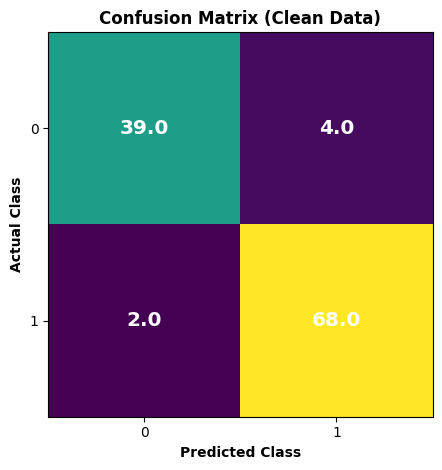

In [40]:
# Summarising results ---> Clean data
best_parameters, clean_cm, clean_test_accuracies, per_fold_clean
print('\nSummarising Results of KNN Classifier on clean data')
print('---------------------------------------------------')

# Average Validation Accuracy of 5 folds
accuracies = [x[0] for x in per_fold_clean]
print('Average Validation Accuracy: ', round(np.mean(accuracies), 4))

# Average Validation Precision of 5 folds
precision = [x[0] for x in clean_test_metrics]
print('Average Validation Precision: ', round(np.mean(precision), 4))

# Average Validation Recall of 5 folds
recall = [x[1] for x in clean_test_metrics]
print('Average Validation Recall: ', round(np.mean(recall), 4))

# Average Test accuracy of 5 folds
print('\nAverage Test accuracy: ', round(np.mean(clean_test_accuracies), 4))
print('\n')

# Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(clean_cm)

# Setting the class labels as ticks
ax.set_xticks(np.arange(len(range(0, 2))))
ax.set_yticks(np.arange(len(range(0, 2))))

# Setting up x- & y-axes labels
ax.set_xlabel('Predicted Class', fontweight = 'semibold')
ax.set_ylabel('Actual Class', fontweight = 'semibold')

# Loop over data dimensions and create text annotations.
for i in range(0, 2):
    for j in range(0, 2):
        text = ax.text(j, i, noisy_cm.iloc[i, j], fontsize = 'x-large', fontweight = 'semibold', 
                       ha = "center", va = "center", color = "w")

ax.set_title("Confusion Matrix (Clean Data)", fontweight = "bold")
fig.tight_layout()
plt.show()


Summarising Results of KNN Classifier on noisy data
---------------------------------------------------
Average Validation Accuracy:  0.9649
Average Validation Precision:  0.9388
Average Validation Recall:  0.928

Average Test accuracy:  0.9385





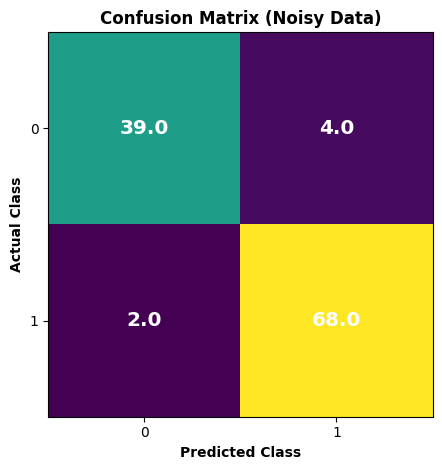

In [41]:
# Summarising results ---> Noisy data
print('\nSummarising Results of KNN Classifier on noisy data')
print('---------------------------------------------------')

# Average Validation Accuracy of 5 folds
accuracies = [x[0] for x in per_fold_noisy]
print('Average Validation Accuracy: ', round(np.mean(accuracies), 4))


# Average Test Precision of 5 folds
precision = [x[0] for x in noisy_test_metrics]
print('Average Validation Precision: ', round(np.mean(precision), 4))

# Average Test Recall of 5 folds
recall = [x[1] for x in noisy_test_metrics]
print('Average Validation Recall: ', round(np.mean(recall), 4))

# Average Test accuracy of 5 folds
print('\nAverage Test accuracy: ', round(np.mean(noisy_test_accuracies), 4))
print('\n\n')

# Plotting Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(noisy_cm)

# Setting the class labels as ticks
ax.set_xticks(np.arange(len(range(0, 2))))
ax.set_yticks(np.arange(len(range(0, 2))))

# Setting up x- & y-axes labels
ax.set_xlabel('Predicted Class', fontweight = 'semibold')
ax.set_ylabel('Actual Class', fontweight = 'semibold')

# Loop over data dimensions and create text annotations.
for i in range(0, 2):
    for j in range(0, 2):
        text = ax.text(j, i, noisy_cm.iloc[i, j], fontsize = 'x-large', fontweight = 'semibold', 
                       ha = "center", va = "center", color = "w")

ax.set_title("Confusion Matrix (Noisy Data)", fontweight = "bold")
fig.tight_layout()
plt.show()

### Confusion Matrices Summary

In our code implementation using the clean dataset, we observe that the accuracy on the validation set is higher compared to the test accuracy. This discrepancy between the two accuracies is expected and can be an indication of a correct classifier implementation.

The validation set is used during the model development process for hyperparameter tuning and model selection. As we iteratively adjust and optimize our classifier based on the validation set performance, it is common to achieve higher accuracy on the validation set. This higher accuracy suggests that our classifier is learning and adapting well to the data it has been trained on.

On the other hand, the test accuracy provides an assessment of the classifier's performance on unseen data that has not been used for training or model selection. It serves as an estimate of how well the classifier is likely to perform in real-world scenarios. Since the test dataset represents new and unseen instances, it is expected to be more challenging, and thus the test accuracy may be slightly lower compared to the validation accuracy.

The observed difference in accuracy between our validation and test sets (0.0282 for the clean data) indicates that our classifier is likely performing reasonably well and that we have avoided overfitting to the validation set. It suggests that our classifier is able to generalize to unseen data, even if our performance on the test set is slightly lower than on the validation set.

Overall, this alignment between the higher validation accuracy and slightly lower test accuracy signifies that our classifier implementation is on the right track and demonstrates its potential to perform well on new, unseen data.

It is also expected that the validation accuracy on a noisy dataset will be lower, compared to a clean dataset (in our case, 0.9649 and 0.9667 respectively).  The presence of noise introduces additional challenges and can hinder the model's ability to accurately classify instances. However, the specific impact of noise on accuracy can vary depending on the complexity of the dataset, the quality and extent of the noise, and the effectiveness of the model in handling noise.


## Conclusion

The output of nested cross-validation utilizing the KNN algorithm reveals interesting findings regarding the selection of parameters, particularly the distance measure and the number of nearest neighbors. Notably, the best parameters vary when noise is added to the data, indicating the influence of noise on the model's performance.

Upon analyzing the results, we observe noticeable changes in Fold 1 when noise is introduced. The accuracy of this fold decreases compared to the accuracy obtained with clean data, with a significant difference of 0.9. This observation highlights the negative impact of noise on the model's ability to correctly classify instances.

In Fold 2, another distinct change occurs with the addition of noise. The best distance measure shifts from Euclidean to Manhattan, indicating that the Manhattan distance outperforms the Euclidean distance in terms of accuracy when noise is present. This change suggests that the Manhattan distance is more robust to the variations and errors introduced by noise.

Amidst these parameter variations, one consistent finding emerges: the importance of the distance function choice. Our analysis demonstrates that the specific distance function employed significantly affects the classification accuracy of the KNN classifier. Notably, the Manhattan distance consistently appears as the best distance measure in 9 out of 10 parameter outputs, highlighting its superiority.

The Manhattan distance consistently yields the highest accuracies for all the noisy datasets, showcasing its ability to handle data with random variations and errors. Additionally, for the clean datasets, the Manhattan distance outperforms the Euclidean and Chebyshev distances in accuracy 4 out of 5 times. This finding underlines the favorable impact of the Manhattan distance function on classification accuracy.

In summary, the output of nested cross-validation emphasizes the influence of noise on parameter selection and performance. The distance function emerges as a crucial parameter, with the Manhattan distance consistently outperforming the Euclidean and Chebyshev distances. These findings highlight the importance of carefully considering the distance measure choice for the KNN algorithm, as it significantly impacts the model's accuracy, particularly in the presence of noise.


**Minimising False Negatives**

For cancer diagnosis, false negatives should be avoided at all costs, since they can have fatal consequences i.e. a false negative Breast Cancer test result indicates that a person does not have breast cancer, when the person actually does have breast cancer.  Hence, recall (also known as sensitivity or true positive rate) is a better metric than precision, due to the nature of our medical diagnosis/ breast cancer problem. We obtained 2 false negatives, for the clean and noisy data:

Identifying all positive cases: Cancer diagnosis aims to detect and identify as many true positive cases (actual breast cancer patients) as possible. Missing even a single positive case can have serious consequences, as it may result in delayed treatment and potentially harm the patient. Recall measures the ability to capture true positives, making it crucial for detecting all cases of cancer.

Minimizing false negatives: False negatives occur when a cancer case is incorrectly classified as negative (benign) by the diagnostic model. These cases are particularly undesirable in cancer diagnosis because they result in missed opportunities for early detection and timely intervention. Maximizing recall helps minimize the number of false negatives and ensures that fewer cancer cases go undetected.

Trade-off with precision: While recall focuses on capturing as many true positives as possible, precision emphasizes the accuracy of positive predictions. In breast cancer diagnosis, precision represents the proportion of correctly identified cancer cases among all positive predictions. While precision is important for avoiding unnecessary treatments and reducing false alarms, it may lead to more false negatives, thereby missing actual breast cancer cases. Striking the right balance between recall and precision is crucial, but when it comes to (breast) cancer diagnosis, prioritizing recall is generally preferred to ensure comprehensive detection and minimize false negatives.

It's important to note that the specific goals and requirements may vary depending on the context and potential consequences. Nonetheless, **in the context of breast cancer diagnosis, maximizing recall is generally considered more critical to avoid missing positive cases and ensure timely intervention.**
 
**The average accuracy on the final test set is, 0.9385 (for both the noisy and clean data). This is our unseen data set, to provide an unbiased final evaluation of a model fit.  This test data set reflects real-world data, the machine learning model has never seen before.**

An accuracy of 0.9385 indicates that the model correctly classified approximately 93.85% of the instances in the test set.  However, it is important to consider the specific requirements and context of the application. The definition of a "good" accuracy can vary depending on factors such as the complexity of the problem, the available data, and the consequences of misclassifications. In some cases, such as medical diagnosis, even higher levels of accuracy may be desired to ensure reliable results.

It is recommended to compare the achieved accuracy with the performance of other models or benchmarks in the field to gain a better understanding of its relative quality. Additionally, considering other evaluation metrics like precision, recall, and F1 score can provide a more comprehensive assessment of the model's performance.


**Future Improvements**

Scaling the data for the KNN algorithm is generally recommended as it helps to improve the algorithm's performance and prevent the dominance of features with larger scales. It ensures that all features contribute proportionately to the distance calculations, leading to more reliable predictions.

To improve on minimizing false negatives, we can consider the following strategies:

- Collect Sufficient and Representative Data: Ensure that our training dataset contains a diverse and representative set of positive cases (cancer instances) to avoid bias. Adequate representation of different subtypes, stages, and demographics will help the model learn to identify various manifestations of cancer accurately.

- Address Class Imbalance: In medical datasets, the prevalence of positive cases (cancer) is often much lower than negative cases (non-cancer). This class imbalance can lead to biased models that tend to predict the majority class (negative) more frequently, resulting in more false negatives. Techniques such as oversampling the minority class or undersampling the majority class can help mitigate this issue and improve the model's ability to detect positive cases.

- Feature Selection and Engineering: Carefully select or engineer relevant features that have a strong correlation with the target variable (cancer). Analyze the available features to ensure they capture important characteristics of cancer cases. This process may involve domain expertise and collaboration with medical professionals to identify crucial indicators of cancer.

- Choose an Appropriate Classifier: Different classifiers have varying strengths in handling false negatives. Consider algorithms specifically designed to minimize false negatives, such as gradient boosting techniques or support vector machines with appropriate class weighting. These algorithms can prioritize recall while maintaining a reasonable level of precision.

- Optimize Classification Threshold: The classification threshold determines the point at which the model predicts positive or negative. By adjusting the threshold, you can prioritize recall over precision. Lowering the threshold can increase the sensitivity of the model and reduce the likelihood of false negatives. However, it may also result in more false positives, so the trade-off between false negatives and false positives should be carefully considered.

- Ensemble Methods: Employing ensemble methods, such as combining multiple models or using techniques like bagging or boosting, can help improve the overall performance and robustness of the model. Ensemble methods can leverage diverse perspectives and reduce the risk of individual models producing excessive false negatives.

- Cross-Validation and Regularization: Apply robust evaluation techniques such as cross-validation to assess the model's performance. Regularization techniques, such as L1 or L2 regularization, can help prevent overfitting, which can reduce false negatives caused by the model memorizing the training data instead of learning general patterns.

- Continual Model Improvement: Machine learning models should be regularly retrained and fine-tuned with new data to keep them up to date. As new data becomes available, you can refine the model to improve its performance, including reducing false negatives. Continual monitoring of the model's performance and feedback from medical experts can guide these improvements.

Note: achieving the ideal balance between false negatives and false positives depends on the specific requirements of the application and the potential consequences associated with misclassifications. Regular assessment, iteration, and collaboration with domain experts are essential to continuously improve the model's ability to minimize false negatives in machine learning.


## References 

1.Cancer Reaserch UK - Risk factors for Breast Cancer
https://www.cancerresearchuk.org/about-cancer/breast-cancer/risks-causes/risk-factors

2.How is breast cancer diagnosed
https://www.cdc.gov/cancer/breast/basic_info/diagnosis.htm

3.AI Outperformed Standard Risk Model for Predicting Breast Cancer
Algorithms identify both missed cancers and breast tissue features that help predict future cancers
https://www.rsna.org/news/2023/june/ai-for-predicting-breast-cancer#:~:text=Algorithms%20identify%20both%20missed%20cancers,that%20help%20predict%20future%20cancers&text=In%20a%20large%20study%20of,study%20were%20published%20in%20Radiology.

4.Better breast cancer diagnosis through machine-learning ultrasound
https://www.rochester.edu/newscenter/breast-cancer-diagnosis-machine-learning-ultrasound-555952/

5.Feature Selection Techniques for Classification and Python Tips for Their Application
https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b

6.How to manage noisy data
https://magoosh.com/data-science/what-is-deep-learning-ai/

7.Sklearn.neighbors.KNeighborsClassifier (for verification purposes)
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

8.Is there a rule-of-thumb for how to divide a dataset into training and validation sets?
https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio

9.KNN Classification using Scikit-learn
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

10.Day 3 — K-Nearest Neighbors and Bias–Variance Tradeoff
https://medium.com/30-days-of-machine-learning/day-3-k-nearest-neighbors-and-bias-variance-tradeoff-75f84d515bdb

11.How to write a confusion matrix in Python? 
https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python

12.Four Reasons Your Machine Learning Model is Wrong (and How to Fix It)
https://www.kdnuggets.com/2016/12/4-reasons-machine-learning-model-wrong.html

13.Summarising Precision/Recall Measures in Multi-class Problem
https://stats.stackexchange.com/questions/287683/summarising-precision-recall-measures-in-multi-class-problem

14.How to find the optimal value of K in KNN?
https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

15.Scikit-learn tutorial on model selection and cross-validation: https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html

16.Generalization Error
https://en.wikipedia.org/wiki/Generalization_error
